# Statistical Liars

In the age of big data and machine learning, we often place unwavering trust in the datasets that fuel our algorithms and decision-making processes. However, beneath the  surface and media presence of these techniques lies a complex and often overlooked reality – datasets can and will contain wrong values. For example, in social science many surveys include a non-trivial amount of liars. It is not hard to see that when the rate of liars is big enough, the empirical conclusion of our study may be seriously flawed. But does it also affect other disciplines?

> Thinking&Discuss: Find a few scientific studies and discuss whether they could contain an amount of liars that may even change the conclusion of the study! Does non social science research also have this problem? 

In this tutorial, we will look on a synthetic experiment. The setting is a Professor who wants to know what type of students cheated on 
his/her exams! Ideally, the professor would like to find a hidden relationship between cheaters and some of ther characteristics. 
This would help him/her to pre-select better students since the course only has limited capacity! The argument here is that it is not 
about punishment but rather to improve the quality of the course.

However, what student would freely admit to cheating? 

**The next section is only to create some data, don't change it. Simply read through it**

We place a hidden relationship here that should be discoverable using data science methods. 

(array([  4.,  22.,  96., 228., 272., 226., 104.,  38.,   9.,   1.]),
 array([11.03493064, 13.87253017, 16.7101297 , 19.54772924, 22.38532877,
        25.2229283 , 28.06052783, 30.89812737, 33.7357269 , 36.57332643,
        39.41092596]),
 <BarContainer object of 10 artists>)

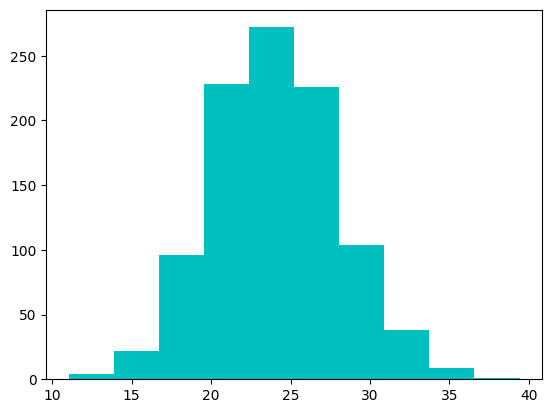

In [163]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# seeding will make sure that the random numbers generated are the same for every run
np.random.seed(seed=42) 
size = 1000

# generate age similar to our real data, a normal distribution 
# Sadly we cannot hand out real data!
age = stats.norm.rvs(loc=24, scale=4, size=size) 
# visualize the distribution
plt.hist(age, color='c')

([<matplotlib.patches.Wedge at 0x177175cd0>,
 [Text(0.6796456080867975, 0.8649172488789476, 'Female'),
  Text(-0.6796456080867975, -0.8649172488789476, 'Male')])

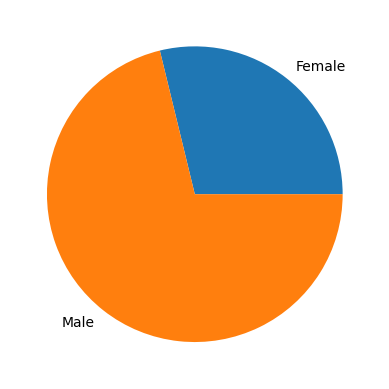

In [164]:
np.random.seed(seed=42) 
# sex, we usually have more males than females
sex = stats.bernoulli.rvs(0.3, size=size) 
number_of_females = sex.sum()
number_of_males = len(sex) - number_of_females
plt.pie([number_of_females, number_of_males], labels=["Female", "Male"])

([<matplotlib.patches.Wedge at 0x1771c2d50>,
 [Text(-0.05871992619937442, 1.0984315956249346, 'Engineering'),
  Text(-0.932445669374288, -0.5835623991186687, 'Natural Science'),
  Text(0.055268861908721705, -1.0986106466366121, 'Computer Science'),
  Text(0.9136555588557895, -0.6125630741172007, 'Economics'),
  Text(1.0899783767029276, -0.1481456658834495, 'Architecture')])

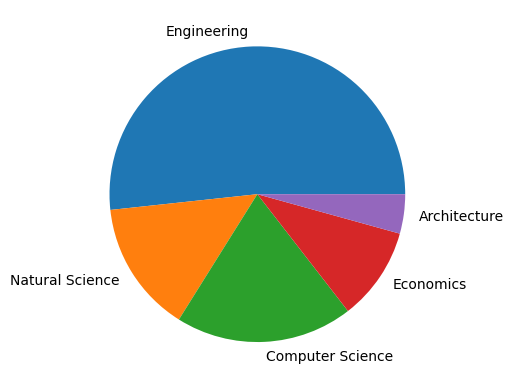

In [165]:
np.random.seed(seed=42) 
# broadly speaking we have following categories:
# Engineering, Natural Science, Computer Science, Economics, Architecture
c = ["Engineering", "Natural Science", "Computer Science", "Economics", "Architecture"]
background = stats.multinomial.rvs(1, [0.5, 0.15, 0.2, 0.1, 0.05], size=size)
plt.pie(background.sum(axis=0), labels=c)

([<matplotlib.patches.Wedge at 0x177214210>,
 [Text(0.6796456080867975, 0.8649172488789476, 'No prior experience'),
  Text(-0.6796456080867975, -0.8649172488789476, 'Has prior experience')])

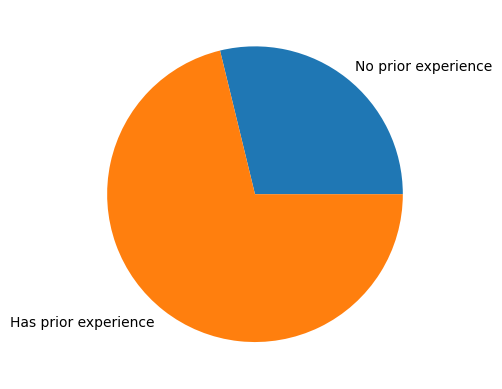

In [166]:
np.random.seed(seed=42)
# prior programming experience
prior_experience = stats.bernoulli.rvs(0.3, size=size)
no_prior_experience = prior_experience.sum()
has_prior_experience = len(prior_experience) - no_prior_experience

plt.pie([no_prior_experience, has_prior_experience], labels=["No prior experience", "Has prior experience"])

In [167]:
# And finally the lie, this ofc we don't know and we just assume something for the experiment!

# These are the hidden parameters that we don't know
# % of the students are cheaters
rate_of_cheaters = 0.2
# % of the cheaters lie that they didn't cheat, someone who didn't cheat has no reason to lie!
rate_of_liars = 0.9

# This is the relationship that we want to discover using data science
# It simply states that people who are younger than 23 nare more likely to cheat
def hidden_relationship(age):
    return 0.5 if age < 23 else 0.0

def ask_student_if_cheated(age):
    # let's there is some correlation between age and cheating
    cheater = stats.bernoulli.rvs(rate_of_cheaters + hidden_relationship(age))
    if cheater: 
        i_am_lying = stats.bernoulli.rvs(rate_of_liars)
        if i_am_lying:
            return 0 # I am not a cheater, lie
        else:
            return 1 # I am a cheater, truth
    else:
        return 0 # I am not a cheater, truth

In [168]:

np.random.seed(seed=42)
raw_features = {
    "age": age,
    "sex": sex,
    "background": background,
    "prior_experience": prior_experience
}

# we ask each student if they cheated, without a good mechanism
raw_features["cheated"] = [ask_student_if_cheated(age[i] ) for i in range(size)]
print(sum(raw_features["cheated"]))

41


# Naive Data Science Approach

Based on data, we would like to gain insights in our data! We assume that we have received this dataset from the latest survey. 
We only have the description of the experiment (which you can see in the way we generated data). 
However, we have no clue what our `rate_of_cheaters` or `rate_of_liars` could be. In fact, we ignore it 
for our first analysis.

First, let’s try to follow the naive data scientists approach of solving this problem. Our goal is to uncover the `hidden_relationship` from 
our data. First, we should try to see if there are any correlations!

Note: Use `raw_features` to obtain your analysis.

[[ 1.          0.03340182  0.04160577  1.         -0.04240914]
 [ 0.03340182  1.         -0.02203733  0.03340182 -0.07878146]
 [ 0.04160577 -0.02203733  1.          0.04160577 -0.01812338]
 [ 1.          0.03340182  0.04160577  1.         -0.04240914]
 [-0.04240914 -0.07878146 -0.01812338 -0.04240914  1.        ]]


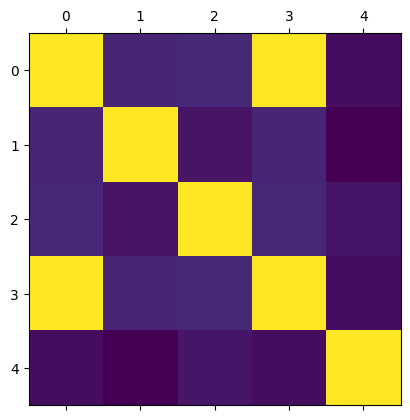

In [169]:
# maybe there is a correlation in our data? Visualize a correlation matrix
background_to_int = [np.argmax(b) for b in raw_features["background"]]
features = [raw_features["sex"], raw_features["age"], background_to_int, raw_features["prior_experience"]]

corr = np.corrcoef(features, raw_features["cheated"])
plt.matshow(corr)
print(corr)

You will notice that there is a negative correlation between age and cheating. Try to visualize it using histograms.

(array([  4.,  20.,  93., 210., 261., 222., 102.,  37.,   9.,   1.]),
 array([11.03493064, 13.87253017, 16.7101297 , 19.54772924, 22.38532877,
        25.2229283 , 28.06052783, 30.89812737, 33.7357269 , 36.57332643,
        39.41092596]),
 <BarContainer object of 10 artists>)

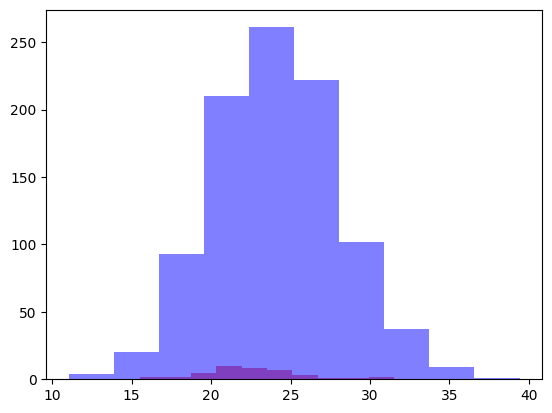

In [170]:
# Let's visualize the Age and Cheated relationship

plt.hist([raw_features["age"][i] for i in range(size) if raw_features["cheated"][i] == 1], color='r', alpha=0.5)
plt.hist([raw_features["age"][i] for i in range(size) if raw_features["cheated"][i] == 0], color='b', alpha=0.5)

You seem to have uncovered an intersting relationship! At this point, you may be eager to come to a quick conclusion.

> Think&Discuss: Can you come up with a conclusion i.e. Who is more likely to cheat? Are you confident about your conclusion?

But... Do you recall that there may be people who lied in your survey? Well, does your conclusion still hold
when you consider liars?

In [171]:
# Let's assume some of the people lied about cheating. That means
# everyone who said they didnt cheated, actually lied with some probability.
# Try to randomly flip some of the non-cheaters to cheaters and see if your conclusion still holds
new_cheated_10 = [1 
                  if (raw_features["cheated"][i] == 0 and stats.bernoulli.rvs(0.1)) or raw_features["cheated"][i] 
                  else 0 
                  for i in range(size)]
new_cheated_25 = [1 
                  if (raw_features["cheated"][i] == 0 and stats.bernoulli.rvs(0.25)) or raw_features["cheated"][i]
                  else 0 
                  for i in range(size)]

new_cheaterd_50 = [1 
                   if (raw_features["cheated"][i] == 0 and stats.bernoulli.rvs(0.5)) or raw_features["cheated"][i]
                     else 0 
                     for i in range(size)]

(array([  4.,  18.,  81., 193., 241., 198.,  94.,  33.,   8.,   1.]),
 array([11.03493064, 13.87253017, 16.7101297 , 19.54772924, 22.38532877,
        25.2229283 , 28.06052783, 30.89812737, 33.7357269 , 36.57332643,
        39.41092596]),
 <BarContainer object of 10 artists>)

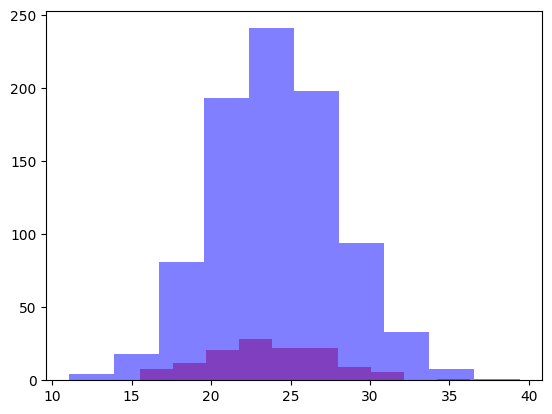

In [172]:
plt.hist([raw_features["age"][i] for i in range(size) if new_cheated_10[i] == 1], color='r', alpha=0.5)
plt.hist([raw_features["age"][i] for i in range(size) if new_cheated_10[i] == 0], color='b', alpha=0.5)

(array([  4.,  17.,  64., 156., 198., 171.,  79.,  30.,   6.,   1.]),
 array([11.03493064, 13.87253017, 16.7101297 , 19.54772924, 22.38532877,
        25.2229283 , 28.06052783, 30.89812737, 33.7357269 , 36.57332643,
        39.41092596]),
 <BarContainer object of 10 artists>)

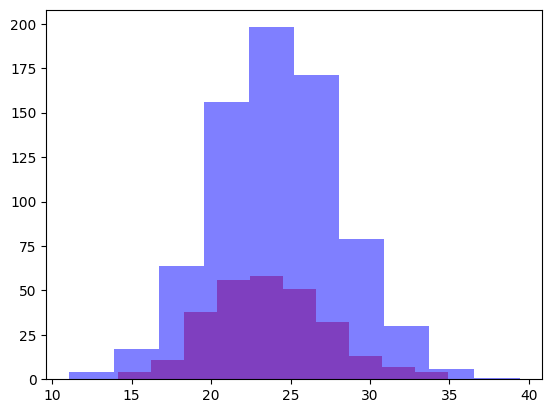

In [173]:
plt.hist([raw_features["age"][i] for i in range(size) if new_cheated_25[i] == 1], color='r', alpha=0.5)
plt.hist([raw_features["age"][i] for i in range(size) if new_cheated_25[i] == 0], color='b', alpha=0.5)

(array([  7.,  27.,  49.,  80.,  88., 110.,  71.,  28.,  17.,   8.]),
 array([14.30448269, 16.32698725, 18.34949181, 20.37199636, 22.39450092,
        24.41700548, 26.43951003, 28.46201459, 30.48451915, 32.5070237 ,
        34.52952826]),
 <BarContainer object of 10 artists>)

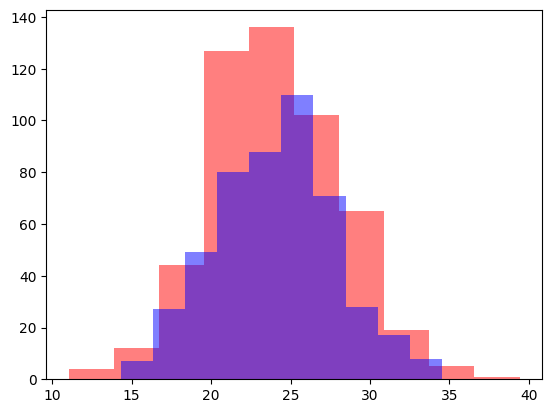

In [174]:
plt.hist([raw_features["age"][i] for i in range(size) if new_cheaterd_50[i] == 1], color='r', alpha=0.5)
plt.hist([raw_features["age"][i] for i in range(size) if new_cheaterd_50[i] == 0], color='b', alpha=0.5)

Notice how your conclusion is becoming weaker (and is falsified) the more liars we have? 
However, with the experiment we have, there simply is no way to know what our true rate of liars and cheaters
is. Thus, we cannot put any certainty in our conclusion. Our correlation does not mean anything! 

(In fact if you increase the rate of liars in the data generation, you would also observe that the correlation disappears slowly)


Consequently, we would be better of if we can design a better mechanism for the survey that at least
incentivise people to tell the truth. 
This way, we only have to deal with not knowning the rate of cheaters. Well, we hardly can get better than 
this because... How would one even know the rate of cheaters without getting honest answers in the first place?

Let's try to do that in the next part.

## A Thought Experiment!

> Think&Discuss: Can you think of a experiment/survey that incentivise people to answer honestly? 
> For that, think about why people lie and what would convince them to tell the truth.

Implement your thought experiment as a mechanism to promote truthful answers! (You may have a different thought experiment that requires a different experimental setup. That’s okay! However, we can only provide code for our experiment in mind. If you want, you can still try to follow this tutorial with your approach!).

Our solutions follows the anonymization idea. If your answer cannot be linked to you, then people will
answer truthfully. However, it is important that the candidate can trust the anonymization method.
The approach is described here:

- Each Candidate has a secret (fair) coin that he/she can flip in private without the interviwer seeing the outcome
- A Candidate flips the coin.
    - If it lands head, the Candidate will answer honestly
    - If it lands tails, the Candidate will flip it again
        - If it lands head, he/she will answer “Yes, I did cheat” regardless of whether this is true
        - If it lands tails, he/she will answer “No, I did not cheat” regardless of whether this is true

Note that the interviewer cannot be sure whether someone cheated because he/she cheated or because of a coin
flip!

In [175]:
np.random.seed(seed=42) 
fair_coin = 0.5

secure_features = {
    "age": age,
    "sex": sex,
    "background": np.argmax(background),
    "prior_experience": prior_experience
}

def ask_student_if_cheated_with_mechanism(age, r=rate_of_cheaters):
    # TODO: Implement the mechanism to ask the students if they cheated 
    cheater = stats.bernoulli.rvs(r + hidden_relationship(age))
    first_flip = stats.bernoulli.rvs(fair_coin)
    if first_flip: # head
        return cheater # truth
    else:
        second_flip = stats.bernoulli.rvs(fair_coin)
        if second_flip:
            return 1 # I am a cheater, regardless of whether this is true
        else:
            return 0 # I did not cheater, regardless of whether this is true

secure_features["cheated"] = [ask_student_if_cheated_with_mechanism(age[i]) for i in range(size)]
print(sum(secure_features["cheated"]))


444


Notice that we suddenly have much more people who claim that they have cheated? That seems to be an issue but it is truly our 
remedy here since we can finally rule out that there are liars.

Next, we want to find out what the rate of cheaters could be. For that we simply guess different rate of cheaters and take their mean. 
The closest mean to the real data should be likely our true rate of cheaters. 

Note that you can use your simulation from above to generate the data!


In [176]:
guessed_rates = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4] # some educated guesses since we don't know the real rate
means = []

for rate in guessed_rates:
    mean = []
    for _ in range(30):
        mean.append(sum([ask_student_if_cheated_with_mechanism(age[i], rate) for i in range(size)]))
    means.append(np.mean(mean))
print(means)

[400.2, 425.03333333333336, 448.6666666666667, 471.3, 499.03333333333336, 523.6333333333333, 548.0333333333333]


Ok, now that we know what values are probably the rate of cheaters. Let's take the top 3 values.
Using the top 3 values, we can resample our real data .

We do that by following our prior knowledge about the experiment. Let `p` be the rate of cheaters. Then:
- if some claims he/she cheated then it may be caused by *heads > true answer* or *tails > heads* = `0.5*p + 0.5*0.5` 
- if some claims he/she did not cheat then it may be caused by *heads > true answer* or *tails > tails* = `0.5 * (1-p) + 0.5*0.5`

Let's resample based on the top 3 values


In [177]:
# first convert the data to a pandas dataframe, it will be much easier if you do that
import pandas as pd
to_pd = pd.DataFrame.from_dict(secure_features)

In [178]:
pd_15 = pd.concat([
    to_pd[to_pd["cheated"] == 1].sample(frac=0.15*0.5 + 0.5*0.5), 
    to_pd[to_pd["cheated"] == 0].sample(frac=0.75*0.5 + 0.5*0.5)
]).to_numpy()

pd_20 = pd.concat([
    to_pd[to_pd["cheated"] == 1].sample(frac=0.2*0.5 + 0.5*0.5), 
    to_pd[to_pd["cheated"] == 0].sample(frac=0.8*0.5 + 0.5*0.5)
]).to_numpy()

pd_25 = pd.concat([
    to_pd[to_pd["cheated"] == 1].sample(frac=0.25*0.5 + 0.5*0.5), 
    to_pd[to_pd["cheated"] == 0].sample(frac=0.75*0.5 + 0.5*0.5)
]).to_numpy()

(array([  8.,  34.,  57., 110., 169., 111.,  51.,  12.,   3.,   1.]),
 array([13.39612077, 15.99760129, 18.59908181, 21.20056233, 23.80204284,
        26.40352336, 29.00500388, 31.6064844 , 34.20796492, 36.80944544,
        39.41092596]),
 <BarContainer object of 10 artists>)

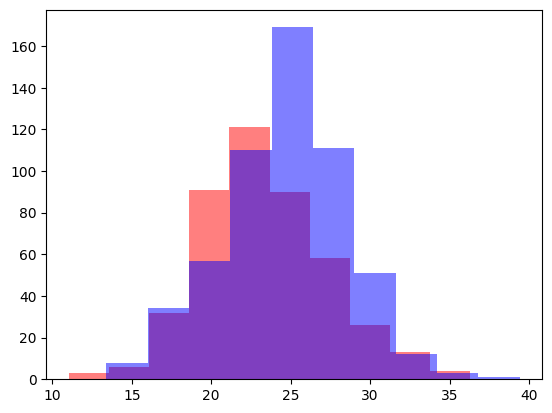

In [179]:
# plot the age distribution for the different samples
plt.hist([to_pd["age"][i] for i in range(size) if to_pd["cheated"][i] == 1], color='r', alpha=0.5)
plt.hist([to_pd["age"][i] for i in range(size) if to_pd["cheated"][i] == 0], color='b', alpha=0.5)

Finally, let us try to reevalute our experiment again and see if we can uncover the hidden state

(array([  6.,  20.,  35.,  62., 111.,  72.,  31.,   8.,   2.,   1.]),
 array([13.39612077, 15.99760129, 18.59908181, 21.20056233, 23.80204284,
        26.40352336, 29.00500388, 31.6064844 , 34.20796492, 36.80944544,
        39.41092596]),
 <BarContainer object of 10 artists>)

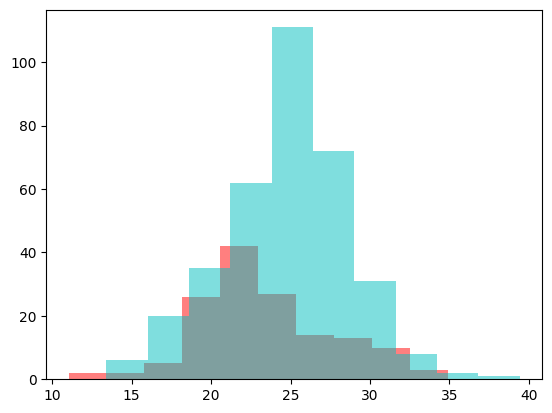

In [180]:
plt.hist([pd_15[i][0] for i in range(len(pd_15)) if pd_15[i][4] == 1], color='r', alpha=0.5)
plt.hist([pd_15[i][0] for i in range(len(pd_15)) if pd_15[i][4] == 0], color='c', alpha=0.5)

(array([ 2., 19., 22., 48., 57., 80., 71., 34., 17., 11.]),
 array([13.39612077, 15.50946152, 17.62280227, 19.73614301, 21.84948376,
        23.96282451, 26.07616526, 28.18950601, 30.30284676, 32.41618751,
        34.52952826]),
 <BarContainer object of 10 artists>)

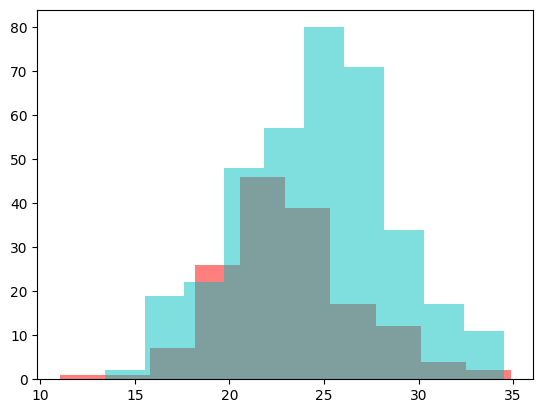

In [181]:
plt.hist([pd_20[i][0] for i in range(len(pd_20)) if pd_20[i][4] == 1], color='r', alpha=0.5)
plt.hist([pd_20[i][0] for i in range(len(pd_20)) if pd_20[i][4] == 0], color='c', alpha=0.5)

(array([  5.,  24.,  34.,  69., 109.,  68.,  30.,   6.,   2.,   1.]),
 array([13.39612077, 15.99760129, 18.59908181, 21.20056233, 23.80204284,
        26.40352336, 29.00500388, 31.6064844 , 34.20796492, 36.80944544,
        39.41092596]),
 <BarContainer object of 10 artists>)

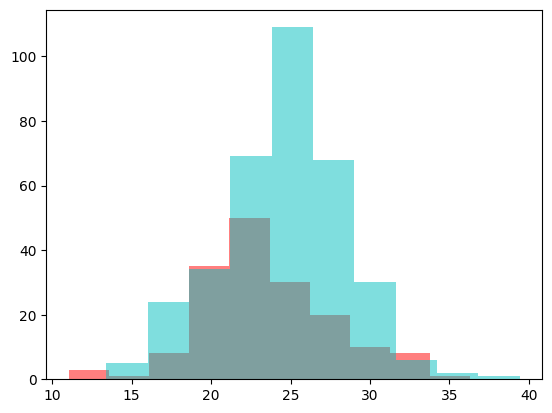

In [182]:
plt.hist([pd_25[i][0] for i in range(len(pd_25)) if pd_25[i][4] == 1], color='r', alpha=0.5)
plt.hist([pd_25[i][0] for i in range(len(pd_25)) if pd_25[i][4] == 0], color='c', alpha=0.5)

And voila! You notice that in all three most likely cases, we seem to come to the same conclusion. 
Even better. We can now confidently state how many people have probably cheated (we may even calculate confidence intervals), 
something we could not do before because we didn't know how many people lied.
That's definitely better than our naive approach.

PS: There is a whole research area (Probabilistic Programming) that deals with this kind uncertainty. However, in practical Data
Science we often simply trust our data to be true. Hence, one should always take any insight from data with a grain of salt!

## Rule of thumb: Garbage Input, Garbage Output and and "most" data is sadly Garbage!